# Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

# Importing Data

In [2]:
# Defining Path
path=r'/Users/guillaumemac/06-2023 Instacart Basket Analysis'

In [3]:
# Importing dataframes
cust_ords_prods=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','cust_ords_prods_merged.pkl'))

In [4]:
cust_ords_prods_1= cust_ords_prods.iloc[:1000000,:]

In [5]:
#Checking the shape of the data
cust_ords_prods_1.shape

(1000000, 32)

# Looking for and addressing PII information

In [6]:
# Checking the data ouptut
cust_ords_prods_1.head(5)

,user_id,First Name,Last Name,Gender,State,Age,Date_joined,Dependants,Marital_status,Income,...,_merge,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


### First and last names should be considered as personally identifiable information even thought they are not unique. I would ask for guidance from the senior analyst to know how to proceed. 

# Dropping First and Last Name columns

In [7]:
#Dropping Peronally Identifiable Information columns without overwritting the data
cust_ords_prods1=cust_ords_prods_1.drop(columns=['First Name','Last Name'])

In [8]:
#Checking the output
cust_ords_prods1.head(5)

,user_id,Gender,State,Age,Date_joined,Dependants,Marital_status,Income,order_id,order_number,...,_merge,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,both,Mid-range product,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


In [9]:
#Creating regions to categorize the states
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [10]:
#Creating a flag signal to help identifier the each purchase's region.
cust_ords_prods1.loc[cust_ords_prods1['State'].isin(Northeast),'Region'] ='Northeast'
cust_ords_prods1.loc[cust_ords_prods1['State'].isin(South),    'Region'] ='South'
cust_ords_prods1.loc[cust_ords_prods1['State'].isin(West),     'Region'] ='West'
cust_ords_prods1.loc[cust_ords_prods1['State'].isin(Midwest),  'Region'] ='Midwest'

In [11]:
#Checking the data shape
cust_ords_prods1.shape

(1000000, 31)

In [12]:
pd.options.display.max_columns=None

In [13]:
#Checking the data output
cust_ords_prods1.head()

,user_id,Gender,State,Age,Date_joined,Dependants,Marital_status,Income,order_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest


In [14]:
#Checking the newly created region flag data output
cust_ords_prods1['Region'].value_counts(dropna = False)

South        330222
West         261100
Midwest      222311
Northeast    186367
Name: Region, dtype: int64

### The total Region flag data output matches the total data output. The new created region column is accurate

In [15]:
#creating a crosstab between the region and spending flag column to determine if there is a difference in spending habits.
crosstab=pd.crosstab(cust_ords_prods1['Region'],cust_ords_prods1['spending_flag'],dropna=False)

In [16]:
crosstab

spending_flag,High Spender,Low Spender
Region,,
Midwest,737,221574
Northeast,486,185881
South,1365,328857
West,874,260226


In [17]:
#creating an exclusion flag
cust_ords_prods1.loc[cust_ords_prods1['max_order'] <= 5, 'activity_loc'] = 'low activity customer'

In [18]:
#Creating a high activity customer flag
cust_ords_prods1.loc[cust_ords_prods1['max_order'] >5, 'activity_loc'] = 'high activity customer'

In [19]:
#Checking the output of the newly created flags
cust_ords_prods1['activity_loc'].value_counts(dropna=False)

high activity customer    929416
low activity customer      70584
Name: activity_loc, dtype: int64

### The output data is accurate

In [20]:
#Creating a new Dataframe for low activity customers
low_activity_df=cust_ords_prods1[cust_ords_prods1['activity_loc'] == 'low activity customer']

In [21]:
#Checking the shape of the data
low_activity_df.shape

(70584, 32)

In [22]:
#Checking the maximum order value in max_order column 
low_activity_df['max_order'].max()

5

In [23]:
#Exporting the low activity customer dataframe
low_activity_df.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_cust.pkl'))

In [24]:
#Creating a new dataframe for high activity customers
high_activity_df=cust_ords_prods1[cust_ords_prods1['activity_loc']== 'high activity customer']

In [25]:
#Checking the shape of the data
high_activity_df.shape

(929416, 32)

In [26]:
#Checking the minimum order value in max_order column 
high_activity_df['max_order'].min()

6

In [27]:
#Exporting the high activity customer dataframe
high_activity_df.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_cust.pkl'))

In [28]:
#Importing the high activity customer dataframe
df_high=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_cust.pkl'))

In [29]:
df_high.head()

,user_id,Gender,State,Age,Date_joined,Dependants,Marital_status,Income,order_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Region,activity_loc
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer


In [30]:
df_high.shape

(929416, 32)

# Creating Profiling Variables

# Age Variable

In [31]:
#Checking the Age descriptive stats
df_high['Age'].describe()

count    929416.000000
mean         49.062556
std          18.364704
min          18.000000
25%          33.000000
50%          49.000000
75%          65.000000
max          81.000000
Name: Age, dtype: float64

In [32]:
#Creating an age group flag, Young adults= 35 years and below, Middle aged= 35 to 60 years old, Seniors= 60 years and above
df_high.loc[df_high['Age']>= 35 & (df_high['Age'] < 60), 'Age_group'] = 'Middle_Age'
df_high.loc[df_high['Age'] <35,'Age_group']='Young_Adult'
df_high.loc[df_high['Age']>= 60,'Age_group']='Senior'

In [33]:
df_high['Age_group'].value_counts()

Middle_Age     368487
Senior         310687
Young_Adult    250242
Name: Age_group, dtype: int64

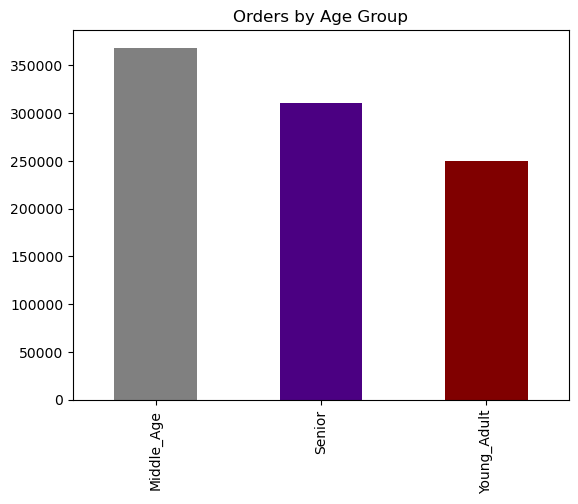

In [34]:
# Creating a Bar chart for Age_group profiling variable
Age_group_chart = df_high['Age_group'].value_counts().plot.bar(color = ['Gray', 'Indigo', 'maroon'], title = 'Orders by Age Group')

In [35]:
#Exporting the visualization
Age_group_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Orders by Age group.png'))

In [36]:
# Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
Age_stats_df= df_high.groupby('Age_group').agg({'days_since_prior_order':['max', 'mean', 'min'],   'prices':['max', 'mean', 'min']})

In [37]:
#Checking the data output
Age_stats_df

days_since_prior_order                 prices               
                               max       mean  min    max      mean  min
Age_group                                                               
Middle_Age                    30.0  10.483062  0.0   25.0  7.741925  1.0
Senior                        30.0  10.792262  0.0   25.0  7.777260  1.0
Young_Adult                   30.0  10.526190  0.0   25.0  7.796916  1.0

In [38]:
df_high.head()

,user_id,Gender,State,Age,Date_joined,Dependants,Marital_status,Income,order_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Region,activity_loc,Age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age


In [39]:
# Checking Age profile with Region
Age_vs_region = pd.crosstab(df_high['Region'],df_high['Age_group'],dropna=False)

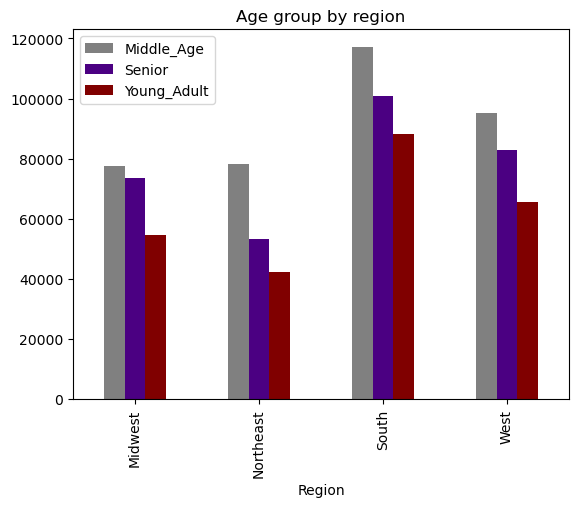

In [40]:
#Visualizing the Age group by region
Age_region=Age_vs_region.plot.bar(color = ['Gray', 'Indigo', 'maroon'], title='Age group by region')
#Positioning the legend
Age_region.legend(loc='upper left')

#### The Middle-Age group makes the most age group across all regions, followed by Senior and Young adult age groups. It can be seen that the South region has a significantly large number of population compared to all the other regions

In [41]:
#Exporting the visualization
Age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age group by region.png'))

In [42]:
# Checking Age profile with spending_flag
Age_vs_spending = pd.crosstab(df_high['spending_flag'],df_high['Age_group'],dropna=False)

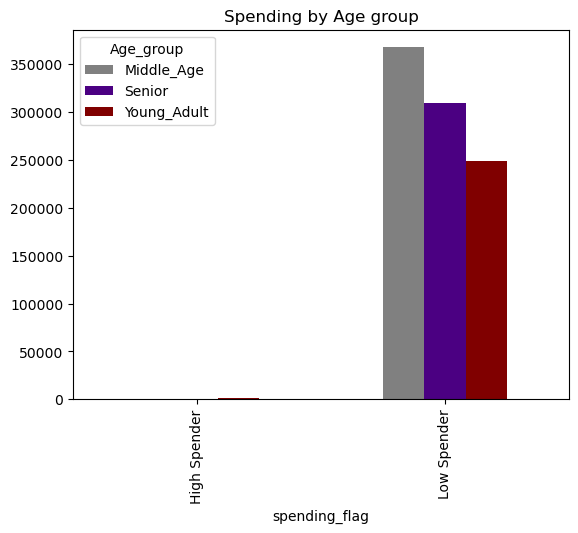

In [43]:
# Visualizing the spending Habits by Age group
Age_spending= Age_vs_spending.plot.bar(color = ['Gray', 'Indigo', 'maroon'], title = 'Spending by Age group')

In [44]:
#Exporting the visualization
Age_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Spending by Age group.png'))

# Income Variable

In [45]:
df_high['Income'].describe()

count    929416.000000
mean      98154.261453
std       39997.952875
min       26227.000000
25%       67660.000000
50%       96245.000000
75%      126317.000000
max      577728.000000
Name: Income, dtype: float64

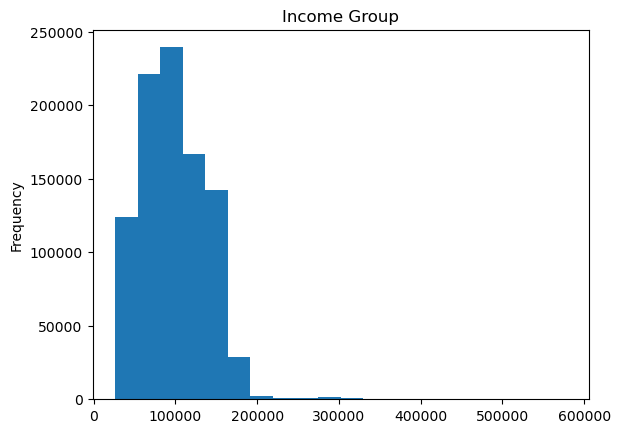

In [46]:
# Creating a histogram to visualize Income groups
Income_hist= df_high['Income'].plot.hist(bins = 20, title='Income Group')

In [47]:
#Exporting the visualization
Income_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income Group Histogram.png'))

In [48]:
df_high.loc[df_high['Income'] >56587 & (df_high['Income'] <= 142953), 'Income_group'] = 'Medium income'
df_high.loc[df_high['Income'] <= 56587, 'Income_group'] = 'Low income'
df_high.loc[df_high['Income'] >142953, 'Income_group'] = 'High income'

In [49]:
df_high['Income_group'].value_counts(dropna=False)

Medium income    644240
High income      142812
Low income       142364
Name: Income_group, dtype: int64

In [50]:
df_high.head()

,user_id,Gender,State,Age,Date_joined,Dependants,Marital_status,Income,order_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Region,activity_loc,Age_group,Income_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age,High income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age,High income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age,High income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age,High income
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Slowest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age,High income


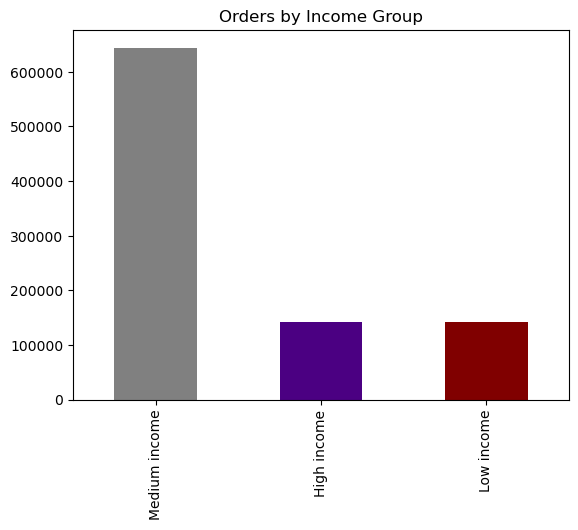

In [112]:
# Creating a Bar chart for Income_group profiling variable
Income_group_chart = df_high['Income_group'].value_counts().plot.bar(color = ['Gray', 'Indigo', 'maroon'], title = 'Orders by Income Group')

In [113]:
#Exporting the visualization
Income_group_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_group_barchart.png'))

In [53]:
# Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
Income_stat_df= df_high.groupby('Income_group').agg({'days_since_prior_order':['max', 'mean', 'min'],   'prices':['max', 'mean', 'min']})

In [54]:
#Printing the Stats
Income_stat_df

days_since_prior_order                 prices               
                                 max       mean  min    max      mean  min
Income_group                                                              
High income                     30.0  10.952353  0.0   25.0  7.905183  1.0
Low income                      30.0  11.094240  0.0   25.0  6.911199  1.0
Medium income                   30.0  10.410514  0.0   25.0  7.927737  1.0

In [55]:
# Checking Income profile with spending_flag
Income_vs_spending = pd.crosstab(df_high['spending_flag'],df_high['Income_group'],dropna=False)

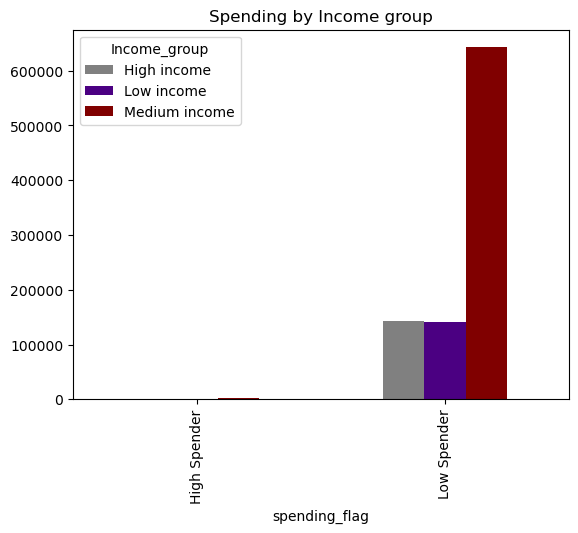

In [56]:
# Visualizing the spending Habits by Income group
Income_spending= Income_vs_spending.plot.bar(color = ['Gray', 'Indigo', 'maroon'], title = 'Spending by Income group')

In [57]:
#Exporting the visualization
Income_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Spending by Income group.png'))

In [58]:
# Checking Income profile with Region
Income_vs_region = pd.crosstab(df_high['Region'],df_high['Income_group'],dropna=False)

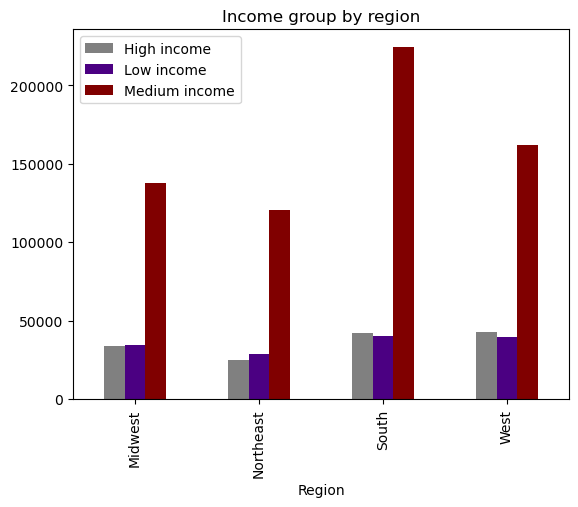

In [59]:
#Visualizing the Income group by region
Income_region=Income_vs_region.plot.bar(color = ['Gray', 'Indigo', 'maroon'], title='Income group by region')
#Positioning the legend
Income_region.legend(loc='upper left')

In [60]:
#Exporting the visualization
Income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income group by Region.png'))

In [61]:
# Importing department data to create profiling variable
df_dep=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'),index_col = False)

In [62]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [63]:
#Renaming column
df_dep.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [64]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [65]:
#Merging the high activity and department dataframes
df_new=df_high.merge(df_dep,on='department_id')

In [66]:
#Checking the data output
df_new.head()

,user_id,Gender,State,Age,Date_joined,Dependants,Marital_status,Income,order_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Region,activity_loc,Age_group,Income_group,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age,High income,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regular days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age,High income,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,high activity customer,Middle_Age,High income,beverages
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30.0,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regular days,Most orders,12,Regular customer,7.057534,Low Spender,26.0,Non-frequent customer,West,high activity customer,Middle_Age,Medium income,beverages
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,1,20,16.0,196,6,1,Soda,77,7,9.0,both,Mid-range product,Busiest days,Average orders,12,Regular customer,7.057534,Low Spender,26.0,Non-frequent customer,West,high activity customer,Middle_Age,Medium income,beverages


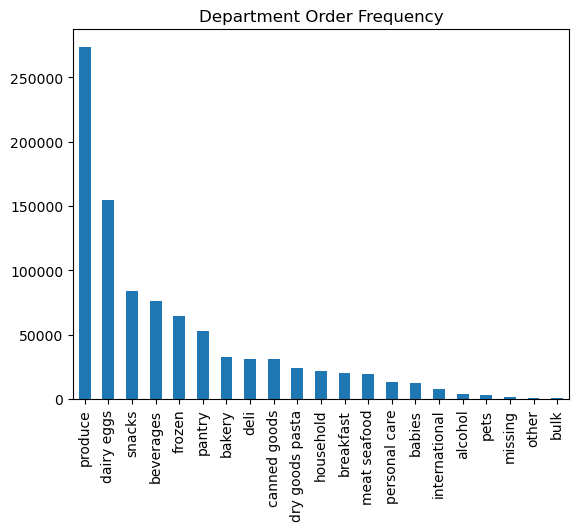

In [67]:
# Creating a Bar chart for department
Department= df_new['department'].value_counts().plot.bar(title = 'Department Order Frequency')

In [68]:
# Exporting the visualization
Department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Frequency.png'))

In [69]:
#Checking department with Age_group Profile
Age_vs_dep=pd.crosstab(df_new['department'],df_new['Age_group'],dropna=False)

In [70]:
Age_vs_dep= Age_vs_dep.sort_values(by=['Middle_Age'], ascending=True)

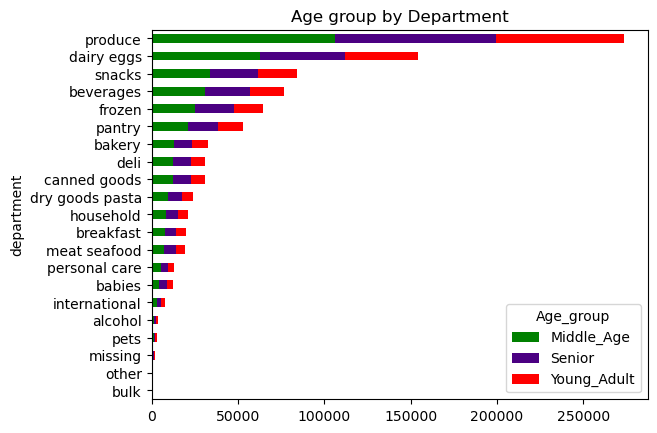

In [71]:
# Visualizing the result with a Bar Chart
Age_dept=Age_vs_dep.plot.barh(color = ['Green', 'Indigo', 'Red'], title='Age group by Department',stacked = True)

### All age groups buy the top 5 in almost similar scale as seen on the bar chart above. The chart also displays the distribution of goods across in respective departments.

In [72]:
# Exporting the visualization
Age_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age group by Department.png'))

# Profiling Customers on cetrain goods in the 'department_id' column

In [73]:
# Creating a flag to profile customers on Snacks use and Snacks non-use
df_new.loc[df_new['department_id'] == 19, 'snacks_customer'] = 'Snacks user'

In [74]:
df_new.loc[df_new['department_id'] != 19, 'snacks_customer'] = 'Snacks non-user'

In [75]:
# We need to use the user_id column to identify customers  are snacks users
update_snacks_column= df_new.loc[df_new['snacks_customer'] == 'snacks user', 'user_id'].unique()

In [76]:
# Updating the snacks_customer column
df_new.loc[df_new['user_id'].isin(update_snacks_column), 'snacks_customer'] = 'snacks user'

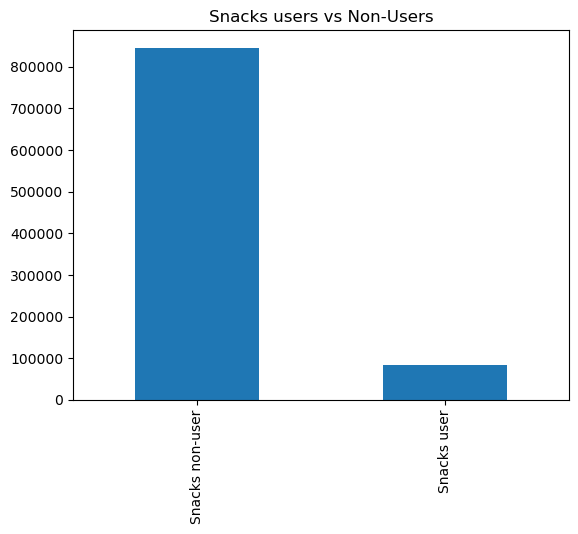

In [77]:
# Visualizing the snacks users
snack_customers = df_new['snacks_customer'].value_counts().plot.bar(title='Snacks users vs Non-Users')

In [78]:
# Checking the distribution
df_new['snacks_customer'].value_counts()

Snacks non-user    845335
Snacks user         84081
Name: snacks_customer, dtype: int64

In [79]:
# Saving the Visualization
snack_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Snacks Users Chart.png'))

In [80]:
# Checking Department with Income profile
Income_vs_dep=pd.crosstab(df_new['department'],df_new['Income_group'],dropna=False,)

In [81]:
Income_vs_dep= Income_vs_dep.sort_values(by=['Medium income'], ascending=True)

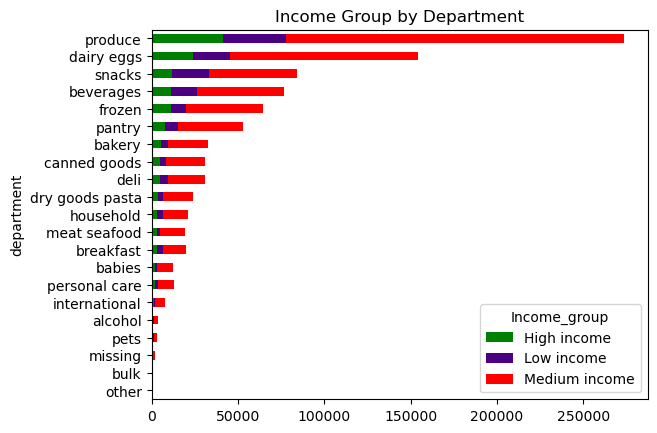

In [82]:
# Visualizing the result with a Bar Chart
Income_dep=Income_vs_dep.plot.barh(color = ['Green', 'Indigo', 'Red'], title='Income Group by Department',stacked = True)

In [83]:
#Exporting the visualization
Income_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income group by Department.png'))

In [84]:
# Checking Department with Region profile
Dep_vs_region=pd.crosstab(df_new['department'],df_new['Region'],dropna=False,)

In [85]:
Dep_vs_region= Dep_vs_region.sort_values(by=['Midwest'], ascending=True)

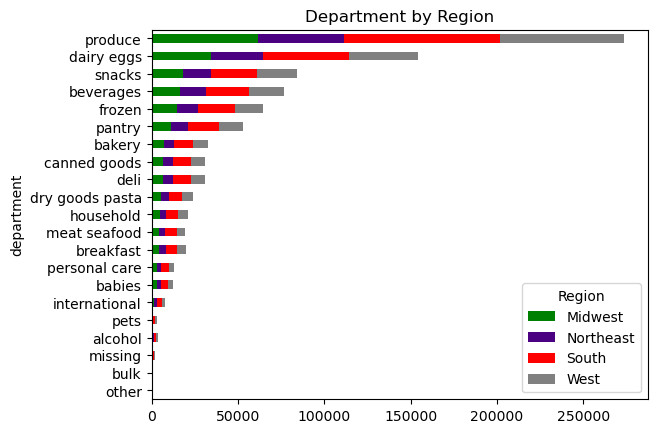

In [86]:
# Visualizing the result with a Bar Chart
Dep_region=Dep_vs_region.plot.barh(color = ['Green', 'Indigo', 'Red','Gray'], title='Department by Region',stacked = True)

In [87]:
#Exporting the visualization
Dep_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department by Region.png'))

In [88]:
#Checking departments with loyalty_flag
Loyalty_dep=pd.crosstab(df_new['department'],df_new['loyalty_flag'],dropna=False)

In [89]:
Loyalty_dep=Loyalty_dep.sort_values(by=['Regular customer'],ascending=True)

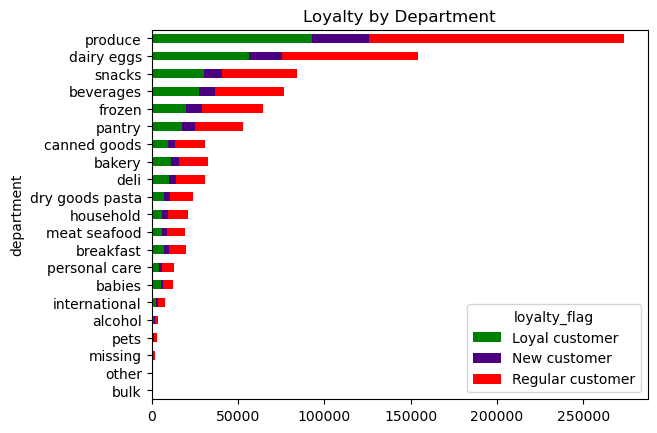

In [90]:
# Visualizing the result with a Bar Chart
Loyalty_dep=Loyalty_dep.plot.barh(color = ['Green', 'Indigo', 'Red'], title='Loyalty by Department',stacked = True)

In [91]:
#Exporting the visualization
Loyalty_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty by Department.png'))

# Creating Family status characteristics

In [92]:
# Checking the different categories in the Family Status column
df_new['Marital_status'].value_counts()

married                             650661
single                              151048
divorced/widowed                     73204
living with parents and siblings     54503
Name: Marital_status, dtype: int64

In [93]:
# Creating a Marital Status flag for customers 
df_new.loc[(df_new['Marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_new['Dependants']==0), 'Marital_status_Flag'] = 'Single WITHOUT Dependants'
df_new.loc[(df_new['Marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_new['Dependants'] >=1),'Marital_status_Flag'] = 'Single WITH Dependants'
df_new.loc[(df_new['Marital_status'] == 'married') & (df_new['Dependants'] == 1), 'Marital_status_Flag'] = 'Married WITHOUT Dependants'
df_new.loc[(df_new['Marital_status'] == 'married') & (df_new['Dependants'] > 1), 'Marital_status_Flag'] = 'Married WITH Dependants'

In [94]:
# Checking the Marital status flag
df_new['Marital_status_Flag'].value_counts()

Married WITH Dependants       445394
Single WITHOUT Dependants     224252
Married WITHOUT Dependants    205267
Single WITH Dependants         54503
Name: Marital_status_Flag, dtype: int64

In [95]:
# Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
df_new.groupby('Marital_status_Flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices  \
                                              max       mean  min    max   
Marital_status_Flag                                                        
Married WITH Dependants                      30.0  10.614349  0.0   25.0   
Married WITHOUT Dependants                   30.0  10.620106  0.0   25.0   
Single WITH Dependants                       30.0  10.311490  0.0   25.0   
Single WITHOUT Dependants                    30.0  10.614835  0.0   25.0   

                                           
                                mean  min  
Marital_status_Flag                        
Married WITH Dependants     7.752223  1.0  
Married WITHOUT Dependants  7.789353  1.0  
Single WITH Dependants      7.769090  1.0  
Single WITHOUT Dependants   7.781770  1.0

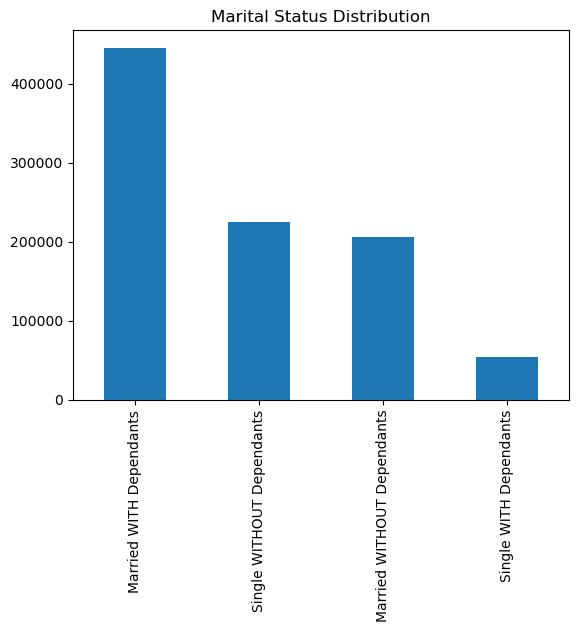

In [96]:
# Creating Bar chart of the Marital status Flag distribution
Marital_status_bar= df_new['Marital_status_Flag'].value_counts().plot.bar(title='Marital Status Distribution')

# The bar chart indicates that a significant number of our customers are Married and have people depending on them.

In [97]:
#Exporting the visualization
Marital_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Marital Status Distribution.png'))

In [98]:
# Checking Family_Status profile with Department
Marital_status_dep=pd.crosstab(df_new['department'],df_new['Marital_status_Flag'],dropna=False)

In [99]:
Marital_status_dep=Marital_status_dep.sort_values(by=['Married WITH Dependants'],ascending=True)

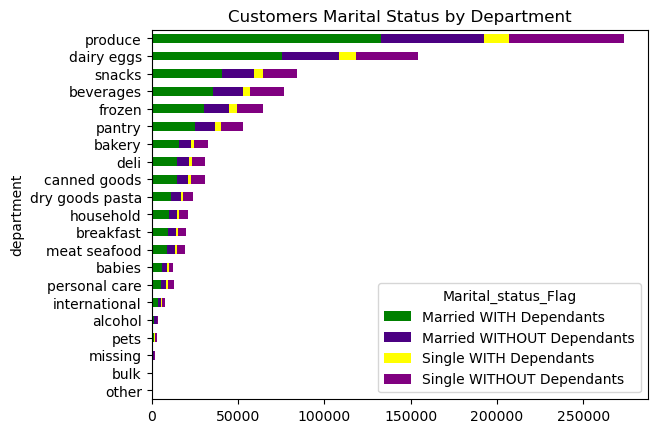

In [100]:
# Visualizing the result with a Bar Chart
Marital_status_dep=Marital_status_dep.plot.barh(color = ['Green', 'Indigo', 'Yellow','Purple'], title='Customers Marital Status by Department',stacked = True)

In [101]:
#Exporting the visualization
Marital_status_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', ' Customers Marital Status by Department.png'))

In [102]:
# Checking Marital status flag  with Region
Marital_status_reg=pd.crosstab(df_new['Region'],df_new['Marital_status_Flag'],dropna=False)

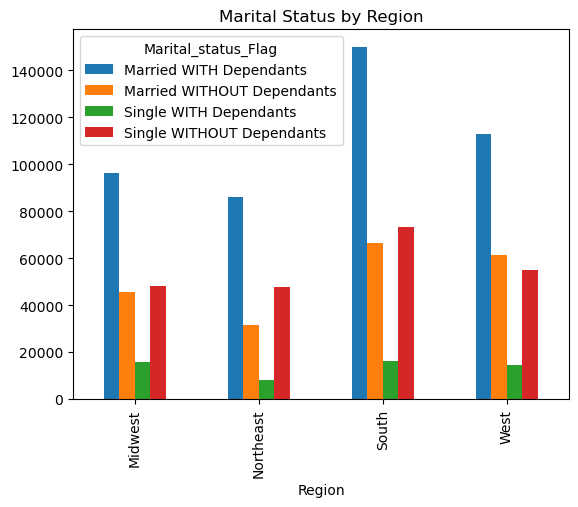

In [103]:
# Creating a bar chart to visualize the Marital Status flag by Region
Marital_status=Marital_status_reg.plot.bar(title='Marital Status by Region')

# The visualization indicates that the south region has a large proportion of all marital status with the most Married WITH Dependants customers ordering from the south.

In [104]:
#Exporting the visualization
Marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Marital Status by Region.png'))

In [105]:
#Checking spending habits with Marital Status
Marital_status_spend=pd.crosstab(df_new['spending_flag'],df_new['Marital_status_Flag'],dropna=False)

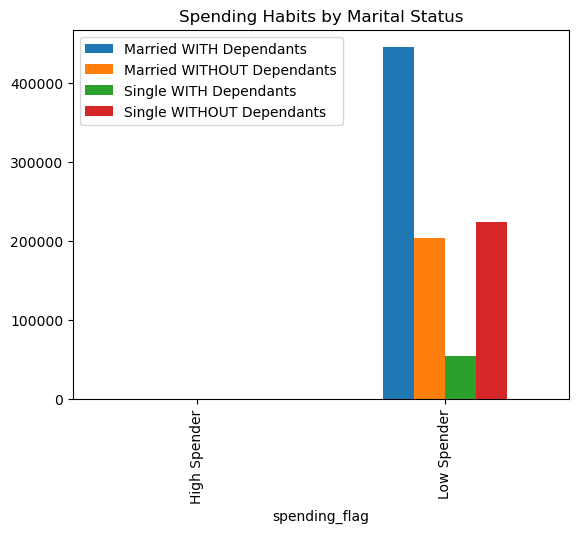

In [106]:
# Visualizing the result with a Bar Chart
Marital_status_spend=Marital_status_spend.plot.bar(title='Spending Habits by Marital Status')
#Positioning the legend
Marital_status_spend.legend(loc='upper left')

In [107]:
# Saving the visualization
Marital_status_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending Habits by Marital Status.png'))

In [108]:
# Spending habits by Loyalty
Loyalty_spend_habits=pd.crosstab(df_new['spending_flag'],df_new['loyalty_flag'],dropna=False)

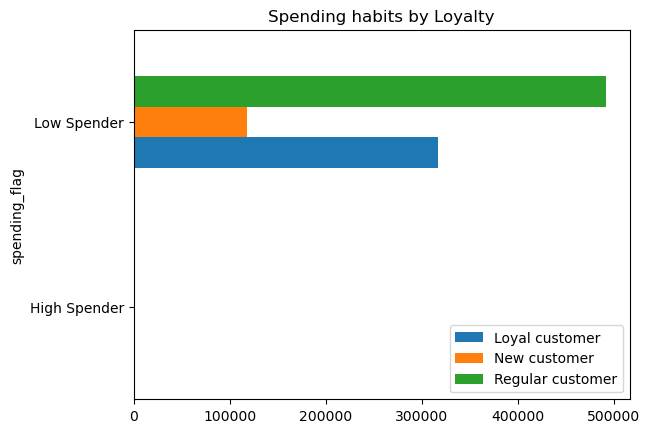

In [109]:
# Visualizing the Spending habits by Loyalty
Loyalty_spend_habits=Loyalty_spend_habits.plot.barh(title='Spending habits by Loyalty')
#Positioning the legend
Loyalty_spend_habits.legend(loc='lower right')

In [110]:
# Saving the visualization
Loyalty_spend_habits.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending habits by Loyalty.png'))

In [111]:
#Exporting the merged dataframe
df_new.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_dept_high_activity_customer_merged.pkl'))

# In cell 4, I had to pare down the dataframe to allow the following cells down the line to run smoothly. This solved the issue I had of the Kernel constantly dying when I was trying to merge two dataframes in cell #65.